## Importing libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
import sklearn
import plotly

print(f'''Checking library versions:\n
pandas: {pd.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Checking library versions:

pandas: 1.5.3
sklearn: 1.2.2
plotly: 5.13.1



## Colecting Data


In [ ]:
perfil = pd.read_excel('/content/dados_perfil.xlsx')
perfil.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
dmedico = pd.read_csv('/content/dados_medicos.csv', sep=";", encoding='latin-1')
dmedico.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
estados = pd.read_csv('/content/unidades_federativas_do_Brasil.csv', sep=";", encoding='latin-1')
estados.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


## Analyzing the collected data

In [ ]:
perfil.describe()

In [ ]:
dmedico.describe()

In [ ]:
estados.describe()

In [ ]:
perfil.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [ ]:
dmedico.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

In [ ]:
estados.isna().sum()

In [ ]:
perfil.loc[perfil['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


In [ ]:
dmedico.loc[dmedico['Colesterol Total'].isnull()]

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
42,43,26.7,165,66,Normal,177.2,NaN,141.9,Não
48,49,24.4,141,68,Normal,113.8,NaN,175.8,Sim
218,219,33.5,142,69,Normal,150.9,NaN,168.3,Não
401,402,31.0,142,90,Alto,104.4,NaN,120.0,Não
565,566,20.6,155,87,Normal,129.9,NaN,155.6,Sim
629,630,28.7,92,86,Normal,143.6,NaN,110.7,Não
710,711,33.6,92,100,Alto,171.9,NaN,119.1,Não
720,721,27.4,112,88,Normal,143.0,NaN,148.1,Não
737,738,33.2,140,61,Normal,133.8,NaN,86.0,Não
839,840,36.1,116,83,Normal,134.2,NaN,160.4,Não


## Processing of collected data

In [ ]:
# Deleting missing perfil data
perfil.dropna(subset=['Idade'], inplace=True)

In [ ]:
perfil.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

In [ ]:
perfil.count()

ID                   990
Gênero               990
Idade                990
Consumo de Álcool    990
Atividade Física     990
cod_uf               990
dtype: int64

In [ ]:
dmedico.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
mean =  dmedico['Colesterol Total'].mean()
median = dmedico['Colesterol Total'].median()

In [ ]:
print(f'The value of mean is: {mean}.\nThe value of median is: {median}')

The value of mean is: 193.21971688574317.
The value of median is: 194.3


In [ ]:
round(mean,2)

193.22

In [ ]:
mean

193.21971688574317

In [ ]:
dmedico['Colesterol Total'].fillna(round(mean,2), inplace=True)

In [ ]:
dmedico.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219720,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,31.830481,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.300000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,193.550000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.200000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
dmedico.count()

ID                               1000
IMC                              1000
Pressão Sistólica                1000
Pressão Diastólica               1000
Nível de Açúcar                  1000
peso                             1000
Colesterol Total                 1000
Triglicerídeos                   1000
Histórico Familiar - Cardiaco    1000
dtype: int64

## Data manipulation and visualization

<Axes: title={'center': 'Dados Médicos - esos'}, xlabel='peso', ylabel='Count'>

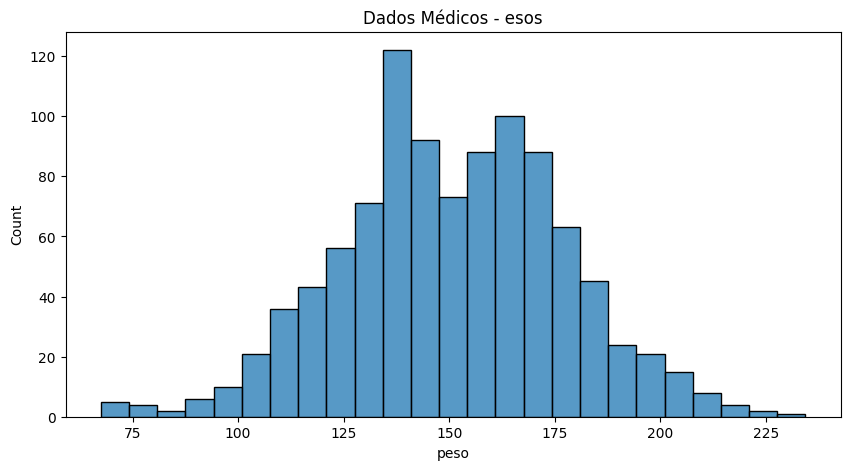

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Dados Médicos - pesos')
sns.histplot(dmedico.peso, bins=20)

<Axes: title={'center': 'Dados Médicos - Triglicerídeos '}, xlabel='Triglicerídeos', ylabel='Count'>

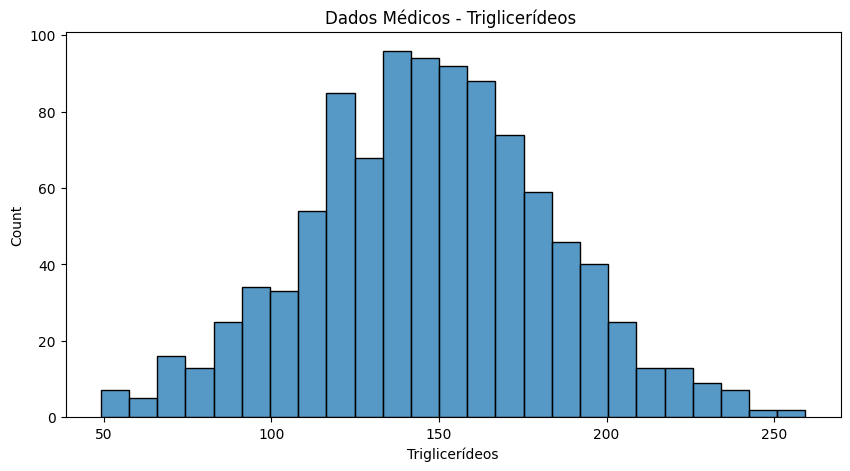

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Dados Médicos - Triglicerídeos ')
sns.histplot(dmedico.Triglicerídeos, bins=25)

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Dados Médicos - Idades')
sns.histplot(dmedico.idade, bins=20)

<Axes: title={'center': 'Boxplot graphic for Dados Médicos - Peso'}, xlabel='peso'>

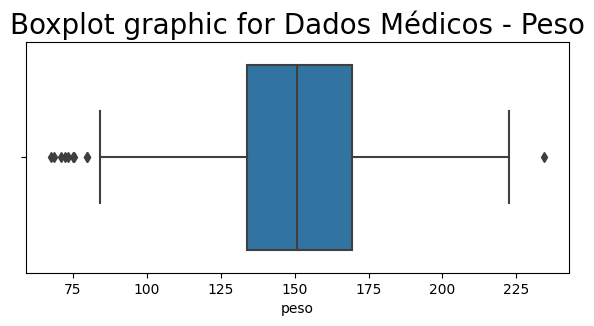

In [ ]:
plt.figure(figsize=(7,3))
plt.title('Boxplot graphic for Dados Médicos - Peso', size=20)
sns.boxplot(x='peso', data=dmedico, orient='h')

In [ ]:
dmedico.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
dmedico['peso'].describe()

count    1000.000000
mean      150.796100
std        26.447694
min        67.500000
25%       133.975000
50%       150.750000
75%       169.425000
max       234.400000
Name: peso, dtype: float64

<Axes: title={'center': 'Boxplot graphic for Dados Médicos - Triglicerídeos'}, xlabel='Triglicerídeos'>

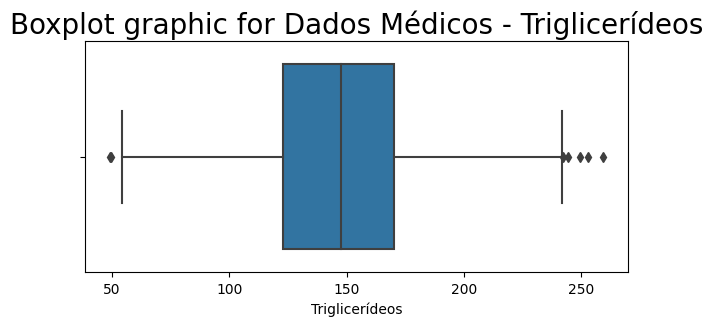

In [ ]:
plt.figure(figsize=(7,3))
plt.title('Boxplot graphic for Dados Médicos - Triglicerídeos', size=20)
sns.boxplot(x='Triglicerídeos', data=dmedico, orient='h')

In [ ]:
dmedico['Triglicerídeos'].describe()

count    1000.000000
mean      147.386100
std        36.455399
min        49.200000
25%       122.675000
50%       147.500000
75%       170.350000
max       259.300000
Name: Triglicerídeos, dtype: float64

## Enriching collected data

In [ ]:
perfil.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
dmedico.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
estados.head()

In [ ]:
estados.rename(columns={'codigo_uf' : 'cod_uf'}, inplace=True)

In [ ]:
estados.head()

,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


In [ ]:
# Merge between perfil e estados
perfil_estados = pd.merge(perfil, estados, on ='cod_uf')
perfil_estados.sort_values('ID')

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,1,M,74.0,Moderado,Atividade Moderada,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
45,2,F,34.0,Baixo,Atividade Moderada,35,SP,São Paulo,-22.19,-48.79,Sudeste,Brasil
80,3,M,18.0,Moderado,Atividade Moderada,29,BA,Bahia,-13.29,-41.71,Nordeste,Brasil
109,4,M,72.0,Baixo,Sedentário,15,PA,Pará,-3.79,-52.48,Norte,Brasil
144,5,F,63.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...
44,995,F,18.0,Alto,Sedentário,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil
366,997,M,24.0,Baixo,Ativo,23,CE,Ceará,-5.20,-39.53,Nordeste,Brasil
184,998,M,78.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil
407,999,M,57.0,Baixo,Atividade Moderada,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil


In [ ]:
perfil.tail()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
994,995,F,18.0,Alto,Sedentário,31
996,997,M,24.0,Baixo,Ativo,23
997,998,M,78.0,Baixo,Atividade Moderada,41
998,999,M,57.0,Baixo,Atividade Moderada,51
999,1000,M,27.0,Baixo,Ativo,12


In [ ]:
# Merge between perfil_estados e dmedico
perfil_op = pd.merge(perfil_estados, dmedico, on='ID').sort_values('ID')
perfil_op

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,M,74.0,Moderado,Atividade Moderada,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,31.7,139,70,Normal,162.1,262.8,152.6,Sim
45,2,F,34.0,Baixo,Atividade Moderada,35,SP,São Paulo,-22.19,-48.79,Sudeste,Brasil,28.1,93,66,Normal,193.4,199.2,152.4,Sim
80,3,M,18.0,Moderado,Atividade Moderada,29,BA,Bahia,-13.29,-41.71,Nordeste,Brasil,26.1,109,86,Normal,162.2,223.4,190.1,Não
109,4,M,72.0,Baixo,Sedentário,15,PA,Pará,-3.79,-52.48,Norte,Brasil,31.6,159,87,Normal,155.4,189.7,130.2,Não
144,5,F,63.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil,37.2,99,63,Normal,161.5,218.3,146.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,995,F,18.0,Alto,Sedentário,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,32.7,148,87,Normal,154.2,203.7,152.9,Não
366,997,M,24.0,Baixo,Ativo,23,CE,Ceará,-5.20,-39.53,Nordeste,Brasil,21.8,137,73,Normal,171.4,194.3,125.2,Sim
184,998,M,78.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil,37.1,94,70,Alto,157.6,188.2,120.7,Sim
407,999,M,57.0,Baixo,Atividade Moderada,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil,30.4,141,77,Alto,112.2,147.5,54.6,Sim


In [ ]:
perfil_op.reset_index(drop=True)

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,regiao,pais,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,M,74.0,Moderado,Atividade Moderada,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,F,34.0,Baixo,Atividade Moderada,35,SP,São Paulo,-22.19,-48.79,Sudeste,Brasil,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,M,18.0,Moderado,Atividade Moderada,29,BA,Bahia,-13.29,-41.71,Nordeste,Brasil,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,M,72.0,Baixo,Sedentário,15,PA,Pará,-3.79,-52.48,Norte,Brasil,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,F,63.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil,37.2,99,63,Normal,161.5,218.3,146.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,995,F,18.0,Alto,Sedentário,31,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,32.7,148,87,Normal,154.2,203.7,152.9,Não
986,997,M,24.0,Baixo,Ativo,23,CE,Ceará,-5.20,-39.53,Nordeste,Brasil,21.8,137,73,Normal,171.4,194.3,125.2,Sim
987,998,M,78.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,Sul,Brasil,37.1,94,70,Alto,157.6,188.2,120.7,Sim
988,999,M,57.0,Baixo,Atividade Moderada,51,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste,Brasil,30.4,141,77,Alto,112.2,147.5,54.6,Sim


<Axes: title={'center': 'Perfil OP - Idade '}, xlabel='Idade', ylabel='Count'>

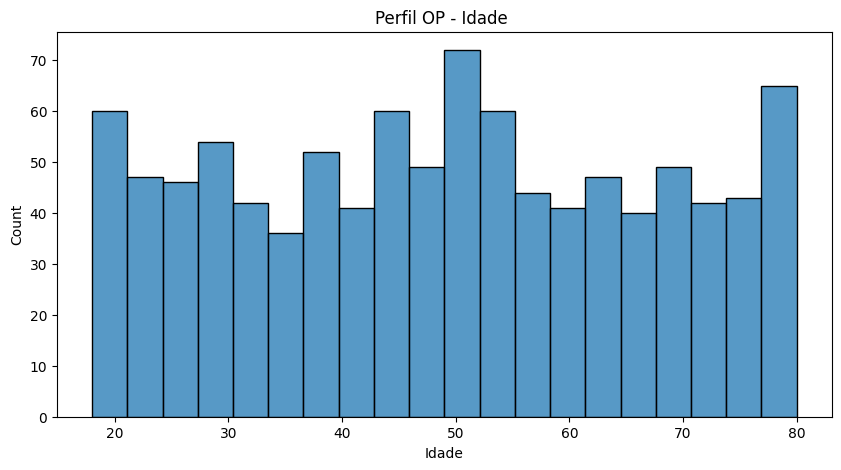

In [ ]:
# Questão 2
plt.figure(figsize=(10,5))
plt.title('Perfil OP - Idade ')
sns.histplot(perfil_op.Idade, bins=20)

## Aplication of Machine Learning Model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calculate_wcss(data_clients):
  wcss = []
  for k in range (1,11):
    kmeans = KMeans(n_clusters = k, random_state=0, init='k-means++')
    kmeans.fit(X=data_clients)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
date_clients = perfil_op[['peso', 'Triglicerídeos']]
date_clients.head()


,peso,Triglicerídeos
0,162.1,152.6
45,193.4,152.4
80,162.2,190.1
109,155.4,130.2
144,161.5,146.0


In [ ]:
# Calculating wcss with data_client
wcss_clients = calculate_wcss(date_clients)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# Questão 4

# Viewing data WCSS
for i in range(len(wcss_clients)):
  print(f'Cluster {i+1} - Value of WCSS: {wcss_clients[i]}')

Cluster 1 - Value of WCSS: 2015696.2225858578
Cluster 2 - Value of WCSS: 1111177.2727539707
Cluster 3 - Value of WCSS: 836791.7296360915
Cluster 4 - Value of WCSS: 620859.4155492408
Cluster 5 - Value of WCSS: 515610.42000297125
Cluster 6 - Value of WCSS: 435226.4664464917
Cluster 7 - Value of WCSS: 385238.68963748816
Cluster 8 - Value of WCSS: 345051.9177678068
Cluster 9 - Value of WCSS: 305875.8972081077
Cluster 10 - Value of WCSS: 277513.7021042403


In [ ]:
# Viewing elbow graphic
graphic_wcss = px.line(x = range(1,11),
                       y = wcss_clients
                       )
fig = go.Figure(graphic_wcss)

fig.update_layout(title = 'Calculating the WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Number of cluster',
                  yaxis_title = 'Value of WCSS',
                  template = 'plotly_white'
                  )
fig.show()

In [ ]:
# Applying the algoritm K-means
kmeans_clients = KMeans(n_clusters = 3, random_state=0)
perfil_op['cluster'] = kmeans_clients.fit_predict(date_clients)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
perfil_op.tail()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf,uf,nome,latitude,longitude,...,pais,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco,cluster
44,995,F,18.0,Alto,Sedentário,31,MG,Minas Gerais,-18.10,-44.38,...,Brasil,32.7,148,87,Normal,154.2,203.7,152.9,Não,2
366,997,M,24.0,Baixo,Ativo,23,CE,Ceará,-5.20,-39.53,...,Brasil,21.8,137,73,Normal,171.4,194.3,125.2,Sim,2
184,998,M,78.0,Baixo,Atividade Moderada,41,PR,Paraná,-24.89,-51.55,...,Brasil,37.1,94,70,Alto,157.6,188.2,120.7,Sim,2
407,999,M,57.0,Baixo,Atividade Moderada,51,MT,Mato Grosso,-12.64,-55.42,...,Brasil,30.4,141,77,Alto,112.2,147.5,54.6,Sim,0
713,1000,M,27.0,Baixo,Ativo,12,AC,Acre,-8.77,-70.55,...,Brasil,39.4,118,61,Normal,131.7,152.9,156.2,Sim,2


In [ ]:
centroids_clusters = kmeans_clients.cluster_centers_
centroids_clusters

array([[132.7443609 , 104.03609023],
       [170.22090909, 195.37272727],
       [151.77857143, 149.50634921]])

In [ ]:
# Questão 5

graphic = px.scatter(x = perfil_op['peso'],
                     y = perfil_op['Triglicerídeos'],
                     color = perfil_op['cluster']
                    )

graphic_centroids = px. scatter (x = centroids_clusters[:,0], y = centroids_clusters[:,1], size = [7,7,7])
fig = go.Figure(data = graphic.data + graphic_centroids.data)
fig.update_layout(title = 'Cluster Analysis',
                  xaxis_title = 'peso',
                  yaxis_title = 'Triglicerídeos',
                  )
fig.show()

#Analyzing the generate data

In [ ]:
cluster_clients = perfil_op

In [ ]:
cluster_clients.loc[cluster_clients['cluster']==0, 'name_cluster'] = 'Risco intermediário'
cluster_clients.loc[cluster_clients['cluster']==2, 'name_cluster'] = 'Risco Alto'
cluster_clients.loc[cluster_clients['cluster']==1, 'name_cluster'] = 'Risco muito Alto'

In [ ]:
cluster_clients

In [ ]:
mean_weight = cluster_clients.groupby(['name_cluster', 'Gênero', 'uf'], as_index=False).agg(mean=('peso', 'mean'))

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribuição das médias por cluster')
sns.barplot(x='name_cluster', y='mean', data=mean_weight, hue='Gênero')

In [ ]:
cluster_clients.groupby(['name_cluster', 'Nível de Açúcar'], as_index=False).agg(total=('Nível de Açúcar', 'count')).sort_values('total')

In [ ]:
cluster_clients.query('name_cluster=="Risco Alto"').describe()

In [ ]:
risco_alto = cluster_clients.query('name_cluster=="Risco Alto"')

In [ ]:
# Questão 6
cluster_clients.groupby('name_cluster')['Colesterol Total'].describe()

In [ ]:
# Questão 7
plt.figure(figsize=(15,10))
plt.title('Graphic of Boxplot')
sns.boxplot (x='Triglicerídeos', y='name_cluster', data=cluster_clients, orient='h')

In [ ]:
# Questão 8
cluster_clients.groupby(['name_cluster', 'Gênero'], as_index=False).agg(total=('Gênero', 'count'))

In [ ]:
# Questão 9
cluster_clients.groupby(['name_cluster', 'uf'], as_index=False).agg(total=('uf', 'count')).sort_values('total')

In [ ]:
# Questão 10
cluster_clients.groupby(['name_cluster', 'Consumo de Álcool'], as_index=False).agg(total=('Consumo de Álcool', 'count'))

In [ ]:
# Questão 11
cluster_clients.groupby('regiao',)['Triglicerídeos'].describe()

In [ ]:
# Questão 12
cluster_clients.query('name_cluster=="Risco intermediário" and Gênero=="M"').describe()

In [ ]:
#Questão 13
test = cluster_clients.query('name_cluster=="Risco Alto"')
test.head()

plt.figure(figsize=(10,5))
plt.title('Distribuição do peso dos pacientes do grupo risco alto')
sns.histplot(test.peso, bins=30)

In [ ]:
# Questão 14
cluster_clients.groupby(['uf', 'Nível de Açúcar'], as_index=False).agg(total=('Nível de Açúcar', 'count')).sort_values('total')

In [ ]:
# Questão 15
risco_alto.groupby('regiao')['Pressão Sistólica'].describe()

In [141]:
# Questão 3 abaixo:

<Axes: title={'center': 'Correlation between IMC and Pressão Diastólica'}>

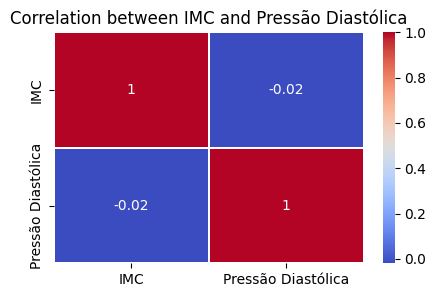

In [142]:
plt.figure(figsize=(5,3))
plt.title('Correlation between IMC and Pressão Diastólica')
data_correlation = perfil_op[['IMC', 'Pressão Diastólica']]
sns.heatmap(data_correlation.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

<Axes: title={'center': 'Correlation between Colesterol Total and Triglicerídeos'}>

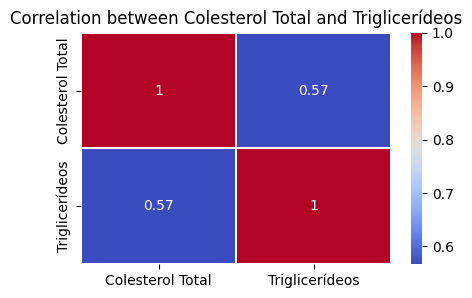

In [139]:
plt.figure(figsize=(5,3))
plt.title('Correlation between Colesterol Total and Triglicerídeos')
data_correlation = perfil_op[['Colesterol Total', 'Triglicerídeos']]
sns.heatmap(data_correlation.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

<Axes: title={'center': 'Correlation between weight and cholesterol'}>

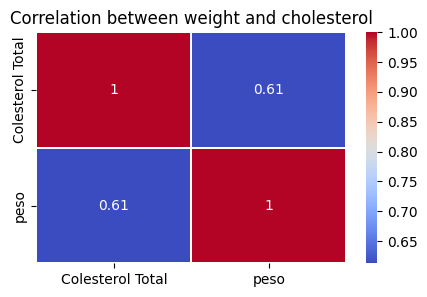

In [138]:
plt.figure(figsize=(5,3))
plt.title('Correlation between Colesterol Total and peso')
data_correlation = perfil_op[['Colesterol Total', 'peso']]
sns.heatmap(data_correlation.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)